# Week 1

## Useful functions

In [5]:
from functions_week1_2 import *

# libraries to import
import numpy as np
import matplotlib.pyplot as plt

# Week 3

## Goals and Objectives

- The success probability of explore-then-commit algo, as a function of sub-optimality gap and exploration time. Of course, this is also averaged over 50-100 runs.

In [6]:
"""
    This function is a "lazy" implementation of the "Explore-Then-Commit" algorithm
    where we stop after the exploration phase for performance analysis.

    Inputs:

    num_arms: number of arms to pull
    exploration: number of times to explore each arm before committing to the best arm
    max_throws: maximum number of pulls allowed
    rwd: reward for a successful pull
    arm_probs: array of probabilities of success for each arm
    
    Outputs:

    results: array of shape (num_arms, max_throws) containing the results of each pull for each arm
    regrets: array of shape (max_throws,) containing the cumulative regret after each pull
    n_successes: array of shape (num_arms,) containing the number of successful pulls for each arm
    selected_best_arm: boolean indicating whether the best arm was selected during the commit phase.
"""
def explore_then_commit(num_arms, exploration, max_throws, rwd, arm_probs):

    # Initialize arrays to keep track of pulls, successes, results, regrets, and values
    n_pulls = np.zeros(num_arms, dtype=int)
    n_successes = np.zeros(num_arms, dtype=int)
    results = np.zeros((num_arms, max_throws), dtype=int)
    regrets = np.zeros(max_throws, dtype=float)
    selected_best_arm = False
    

    # Counter for the current regret value
    pull_counter = 0

    cumulative_regret = 0

    p_best = np.max(arm_probs)

    # Exploration phase for each arm
    for arm in range(num_arms):
        for i in range(exploration):

            n_pulls[arm] += 1
            pull_counter += 1
            
            if np.random.rand() < arm_probs[arm]:
                n_successes[arm] += 1
                reward = rwd
            else:
                reward = 0

            results[arm, n_pulls[arm] - 1] = reward
            cumulative_regret += p_best - arm_probs[arm]
            regrets[pull_counter - 1] = cumulative_regret

    #arm = np.random.randint(num_arms)
    # Commit phase
    if np.any(n_pulls > 0):
        arm = np.argmax(np.where(n_pulls > 0, n_successes / n_pulls, 0))
    else:
        arm = np.random.randint(num_arms)
    
    if arm == np.argmax(arm_probs):
        selected_best_arm = True
    
    return results, regrets, n_successes, selected_best_arm

### Function that runs the explore-then-commit algorithm nbr_runs times and returns the average succes rate of the algorithm.
- A success is when the best arm is chosen at the commit time.

In [7]:
"""
    Runs the explore then commit algorithm a given number of times and returns the percentage of times the 
    best arm was selected and the average regret over all runs.

    Inputs:
        num_arms: Number of arms.
        exploration: Exploration factor, between 0 and 1.
        max_throws: Maximum number of throws.
        rwd: Reward
        arm_probs (np.ndarray): True probabilities for each arm.
        nbr_runs: Number of times to run the algorithm.

    Returns:
        Tuple[float, np.ndarray]: 
        -Percentage of times the best arm was selected
        -Array of the average regret over all runs.
"""
def run_explore_then_commit(num_arms, exploration, max_throws, rwd, arm_probs, nbr_runs):
    
    # Initialize array to keep track of the number of times the best arm was selected
    selected_best_arm = np.zeros(nbr_runs, dtype=bool)

    # Initialize array to keep track of the regrets
    regrets = np.zeros(max_throws, dtype = float)
    
    # Run the explore then commit algorithm a given number of times
    for i in range(nbr_runs):
        _, regret, _, selected_best_arm[i] = explore_then_commit(num_arms, exploration, max_throws, rwd, arm_probs)
        regrets += regret
        #print("Trial " + str(i) + ", best arm selected: " + str(selected_best_arm[i])+ ", exploration: " + str(exploration))
        
    # Return the percentage of times the best arm was selected and the average regret over all runs
    return float(np.sum(selected_best_arm) / nbr_runs) , regrets / nbr_runs

### Function that plots the success rate as a function of the sub-optimality gap using the previous function.

In [132]:
"""
    Function that runs the 'run_explore_then_commit' function for a range of values of T_EXPLORATION and plots the array of 
    percentages as a function of T_EXPLORATION
    
    Inputs:

    num_arms : int
        The number of arms in the bandit problem
    t_explorations : numpy array
        The array of exploration values to try
    max_throws : int
        The maximum number of pulls allowed for each arm (>= num_arms * t_explorations)
    rwd : float
        The reward amount for each pull (1)
    arm_probs_list : list
        The list of  arm probability distributions for different gaps
    nbr_runs : int
        The number of runs to average over
    gaps : list
        The list of gaps to try
"""
def plot_explore_then_commit(num_arms, t_explorations, max_throws, rwd, arm_probs_list, nbr_runs, gaps):
    
    # Initialize array to keep track of the success rates for each gap
    success_rate_list_collection = []

    # Initialize array to keep track of the failure rates for each gap
    failure_rate_list_collection = []

    # Initialize array to keep track of the average regret for each gap
    regrets_per_gap = []

    # Run the 'run_explore_then_commit' function for a range of values of T_EXPLORATION
    probs_index = 0
    for arm_probs in arm_probs_list:
        print("Gap: " + str(gaps[probs_index]) + ", Probs: " + str(arm_probs))
        
        # Initialize array to keep track of the success rates for the value of t_exploration
        selected_best_arm_list = np.zeros(len(t_explorations), dtype=float)
        probabilies_not_bost_arm = np.ones(len(t_explorations), dtype=float)

        # Run the 'run_explore_then_commit' function for the value of t_exploration
        i = 0
        for t_exploration in t_explorations:
            selected_best_arm_list[i], regrets = run_explore_then_commit(num_arms, t_exploration, max_throws, rwd, arm_probs, nbr_runs)
            
            # If t_exploration is the last value of the array, add the average regret to the array
            if t_exploration == t_explorations[-1]:
                regrets_per_gap.append(regrets)
            i += 1
        failure_rate_list_collection.append(probabilies_not_bost_arm - selected_best_arm_list)
        success_rate_list_collection.append(selected_best_arm_list)
        probs_index += 1   

    # Plot the array of percentages as a function of T_EXPLORATION
    for i in range(len(success_rate_list_collection)):
        plt.plot(t_explorations, success_rate_list_collection[i], label = "Gap: " + str(gaps[i]))
    plt.xlabel("T_EXPLORATION")
    plt.ylabel("P(best arm selected)")
    plt.grid()
    plt.title("P(best arm selected) as a function of the T_EXPLORATION")
    plt.legend()
    plt.show()

     # Plot the array of percentages as a function of T_EXPLORATION
    for i in range(len(success_rate_list_collection)):
        plt.plot(t_explorations, success_rate_list_collection[i], label = "Gap: " + str(gaps[i]))
    plt.xlabel("T_EXPLORATION")
    plt.ylabel("P(best arm selected)")
    plt.title("P(best arm selected) as a function of the T_EXPLORATION")
    plt.legend()
    # plot the x axis in log scale
    plt.xscale("log")
    plt.grid()
    plt.show()
    

    gap_index = 0
    # Plot the regret in a line graph
    x_axis=range(max_throws),     
    labels = ["Regret"]
    plt.plot(regrets_per_gap[gap_index])
    plt.legend(labels)
    plt.xlabel("Number of pulls")
    plt.ylabel("Cumulative Regret")
    plt.title("Cumulative Regret with Gap: " + str(gaps[gap_index]))
    plt.grid()
    plt.show()

    # Plot the array of percentages as a function of T_EXPLORATION
    for i in range(len(failure_rate_list_collection)):
        plt.plot(t_explorations, failure_rate_list_collection[i], label = "Gap: " + str(gaps[i]))
    plt.xlabel("T_EXPLORATION")
    plt.ylabel("P(NOT best arm selected)")
    plt.grid()
    plt.title("P(NOT best arm selected) as a function of the T_EXPLORATION")
    plt.legend()
    plt.show()



    

## Setup

In [9]:
#Initialisation of general parameters for the Explore then Commit strategy of the Multi-Armed Bandit problem

# Total number of arms
N_ARMS = 5

# exploration time
T_EXPLORATION = 1000

# divide T_exploration in 100 values and fill array of exploration times
T_EXPLORATION_ARRAY = np.linspace(0, T_EXPLORATION, 51, endpoint= True, dtype=int) 

# print the array of exploration times
print("Values of T_EXPLORATION: " + str(T_EXPLORATION_ARRAY))


# reward for a win
REWARD = 1

# sub-optimality gap
GAPS = [0.01, 0.02, 0.1, 0.2, 0.5]

# Array of list of arms Probabilities repartitions
array_probs = []

# Probability repartition with sub-optimality gap
for gap in GAPS:

    # probability of success for the second best arm as a random number between 0 and 0.5
    p_second_best = np.random.rand() * (1 - gap)

    # probability of success for the best arm
    p_best = p_second_best + gap

    # calculate the other arm probabilities as random between 0 and p_second_best
    probs = np.random.rand(N_ARMS - 2) * p_second_best

    # add the best and second best arm probabilities
    probs = np.append(probs, [p_best, p_second_best])

    # shuffle the probabilities and add them to the list
    np.random.shuffle(probs)
    array_probs.append(probs)





Values of T_EXPLORATION: [   0   20   40   60   80  100  120  140  160  180  200  220  240  260
  280  300  320  340  360  380  400  420  440  460  480  500  520  540
  560  580  600  620  640  660  680  700  720  740  760  780  800  820
  840  860  880  900  920  940  960  980 1000]


Gap: 0.01, Probs: [0.02588581 0.29993554 0.67836204 0.79252716 0.78252716]
Gap: 0.02, Probs: [0.48959397 0.61374268 0.57676414 0.63374268 0.58563539]
Gap: 0.1, Probs: [0.25696942 0.08613063 0.28473507 0.07686393 0.38473507]
Gap: 0.2, Probs: [0.0860748  0.28653652 0.05838374 0.08653652 0.06770354]
Gap: 0.5, Probs: [0.37747131 0.08215118 0.93406404 0.39905351 0.43406404]


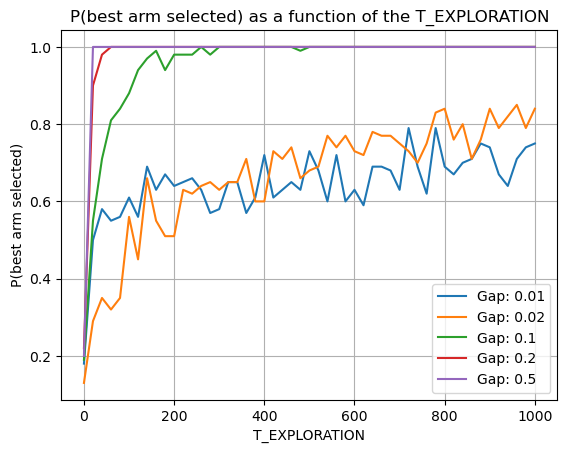

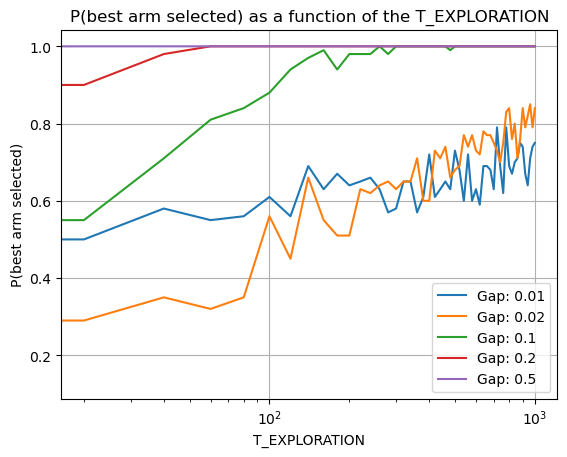

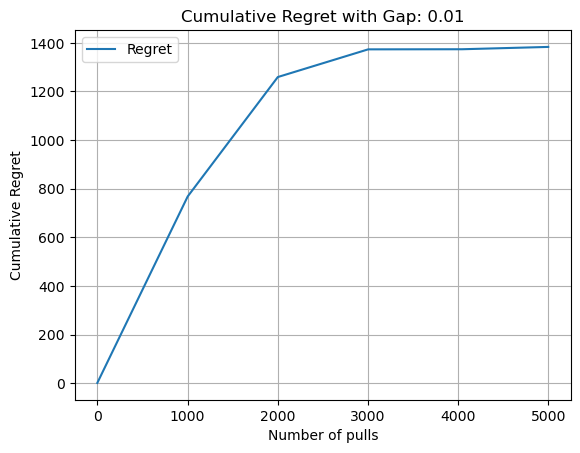

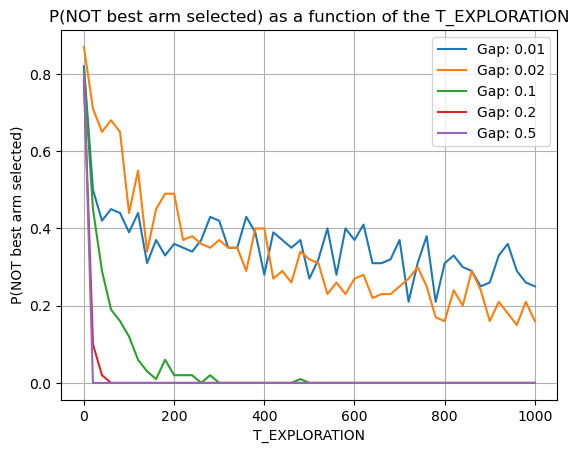

In [133]:
# Run the 'plot_explore_then_commit' function for 5 arms, 10000 throws, a reward of 1, and 100 runs

# simple T_EXPLORATION_ARRAY
TEST_EXPLORATION_ARRAY = [0, 1, 2, 3, 4, 5, 10]

plot_explore_then_commit(N_ARMS, T_EXPLORATION_ARRAY, N_ARMS * T_EXPLORATION , 1, array_probs, 100, GAPS)

Setup for two arms

Gap: 0.01, Probs: [0.4567372422865881, 0.44673724228658807]
Gap: 0.02, Probs: [0.9304316252707019, 0.9104316252707019]
Gap: 0.1, Probs: [0.7784979926577253, 0.8784979926577253]
Gap: 0.2, Probs: [0.23279498878422125, 0.4327949887842213]
Gap: 0.5, Probs: [0.02514820939694501, 0.5251482093969451]


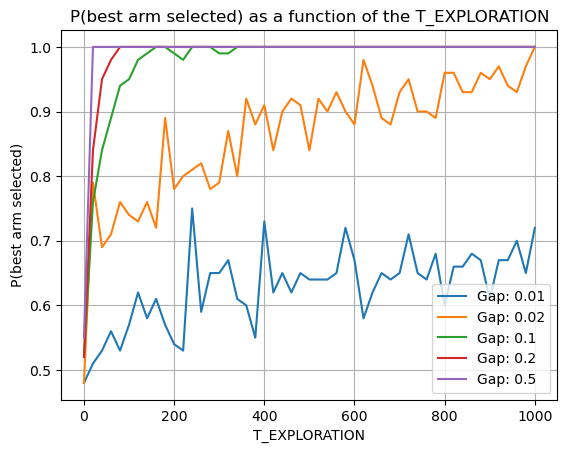

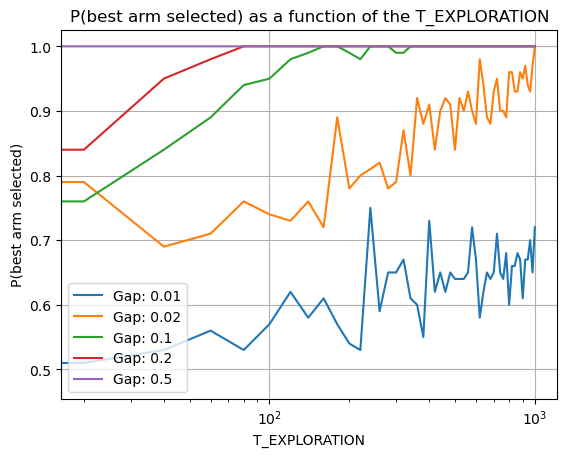

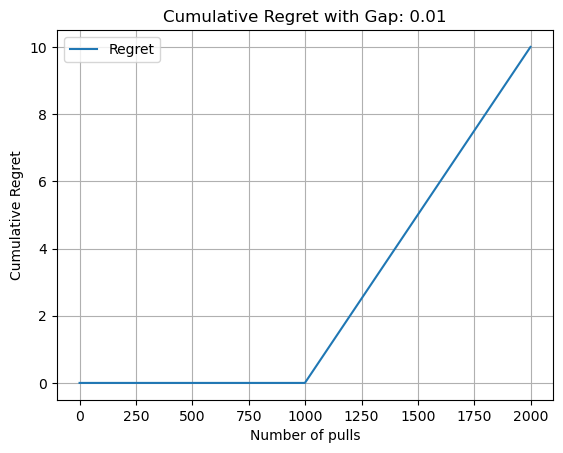

In [11]:
#Initialisation of general parameters for the Explore then Commit strategy of the Multi-Armed Bandit problem

# Total number of arms
N_ARMS = 2

# sub-optimality gap
GAPS = [0.01, 0.02, 0.1, 0.2, 0.5]

# Array of list of arms Probabilities repartitions
array_probs = []

# Probability repartition with sub-optimality gap
for gap in GAPS:

    # probability of success for the second best arm randomly chosen between 0 and 0.5
    p_second_best = np.random.rand() * (1 - gap)

    # probability of success for the best arm
    p_best = p_second_best + gap

    # add the best and second best arm probabilities
    probs = [p_best, p_second_best]

    # shuffle the probabilities and add them to the list
    np.random.shuffle(probs)
    array_probs.append(probs)

plot_explore_then_commit(N_ARMS, T_EXPLORATION_ARRAY, N_ARMS * T_EXPLORATION , 1, array_probs, 100, GAPS)


## Thompson Sampling

In [127]:
"""
Thompson Sampling algorithm with beta distributions for a binary reward setting.

Inputs:
- num_arms: number of arms to choose from
- max_throws: maximum number of throws to simulate
- arm_probs: probability of success for each arm
- Output:
- regrets: array of regrets for each pull
- success_rate: number of times the best arm was selected divided by the number of pulls
"""
def thompson_sampling_beta(num_arms, max_throws, arm_probs, num_runs):


    # Initialize beta distributions for each arm
    # a = number of successes + 1, b = number of failures + 1
    a = np.ones(num_arms)
    b = np.ones(num_arms)

    # Initialize variables to keep track of the regrets and the number of times the best arm is pulled
    regrets = np.zeros(num_runs)
    num_best_pulls = 0
    best_arm = np.argmax(arm_probs)
    cumulative_regret = 0

    if max_throws == 0:
        return regrets, 0


    # Play the remaining rounds
    for i in range(max_throws):
        # Sample from each beta distribution to get arm selections
        arm_samples = [np.random.beta(a[j], b[j]) for j in range(num_arms)]
        #arm_samples = arm_probs

        # Choose the arm with the highest sample
        chosen_arm = np.argmax(arm_samples)

        # Play the chosen arm and update the corresponding beta distribution
        reward = 1 if np.random.rand() < arm_probs[chosen_arm] else 0
        a[chosen_arm] += reward
        b[chosen_arm] += 1 - reward

        # Update the regrets
        cumulative_regret += arm_probs[best_arm] - arm_probs[chosen_arm]
        regrets[i] = cumulative_regret

        # Update the number of times the best arm is pulled
        if chosen_arm == best_arm:
            num_best_pulls += 1

    # return the cumulative regrets and success rate
    return regrets, num_best_pulls / max_throws


### Function that runs the thompson sampling with Beta distribution nbr_runs times and returns the average succes rate of the algorithm.
- A success is when the best arm is chosen at the commit time.

In [128]:
"""
    Runs the Thompson Sampling algorithm with a beta distribution for a given number of arms, maximum number of throws,
    arm probabilities, and number of runs.

    Args:
    - num_arms: the number of arms
    - max_throws: the maximum number of throws
    - arm_probs: a list of floats representing the probabilities of each arm
    - nbr_runs: the number of times to run the algorithm

    Returns:
    - regrets: a numpy array representing the cumulative regrets for each pull of the algorithm
    - avg_success_rate: a float representing the average success rate over all runs
    """
def run_thompson_sampling_beta(num_arms, throw, arm_probs, nbr_runs, max):
    # Initialize array to keep track of the success rate and regrets
    success_rates = np.zeros(nbr_runs)
    regrets = np.zeros(max, dtype=float)

    # Run the Thompson Sampling algorithm a given number of times
    for i in range(nbr_runs):
        regret, success_rates[i] = thompson_sampling_beta(num_arms, throw, arm_probs, max)
        # Save the results in the arrays
        regrets += regret
        #print("Trial " + str(i) + ", best rate selected: " + str(success_rates[i])+ ", Throw: " + str(throw))
        

    # Calculate the average regret and success rate over all runs
    avg_success_rate = np.mean(success_rates)

    return regrets / nbr_runs, avg_success_rate


In [129]:
def plot_thompson_sampling_beta(num_arms, throws_list, arm_probs_list, nbr_runs, gaps):
    max_throw = max(throws_list)

    # Initialize array to keep track of the success rates for each gap
    success_rate_per_gap = []

    # Initialize array to keep track of the failure rates for each gap
    failure_rate_per_gap = []

    # Initialize array to keep track of the average regret for each gap
    regrets_per_gap = []

    # Run the Thompson Sampling algorithm for each gap
    for i, arm_probs in enumerate(arm_probs_list):
        print(f"Gap: {gaps[i]}, Probs: {arm_probs}")
        selected_best_arm_list = np.zeros(len(throws_list), dtype=float)
        prob_not_best_arm_list = np.ones(len(throws_list), dtype=float)

        for j, nbr_throw in enumerate(throws_list):
            regrets, selected_best_arm_list[j] = run_thompson_sampling_beta(num_arms, nbr_throw, arm_probs, nbr_runs, max_throw) 
            #print("Throw: " + str(nbr_throw) + ", best rate selected: " + str(selected_best_arm_list[j]))
            # If nbr_throw is the last value of the array, add the average regret to the array
            if nbr_throw == max_throw:
                regrets_per_gap.append(regrets)
        failure_rate_per_gap.append(1 - selected_best_arm_list)
        success_rate_per_gap.append(selected_best_arm_list)

    # Plot the array of percentages as a function of the number of pulls
    for i in range(len(gaps)):
        plt.plot(throws_list, success_rate_per_gap[i], label = "Gap: " + str(gaps[i]))
    plt.xlabel("Number of pulls")
    plt.ylabel("P(best arm selected)")
    plt.grid()
    plt.title("P(best arm selected) as a function of the number of pulls")
    plt.legend()
    plt.show()

    # Plot the array of percentages as a function of the number of pulls
    for i in range(len(gaps)):
        plt.plot(throws_list, success_rate_per_gap[i], label = "Gap: " + str(gaps[i]))
    plt.xlabel("Number of pulls")
    plt.ylabel("P(best arm selected)")
    plt.title("P(best arm selected) as a function of the number of pulls")
    plt.legend()
    # plot the x axis in log scale
    plt.xscale("log")
    plt.grid()
    plt.show()

    # Plot the array of percentages as a function of the number of pulls
    for i in range(len(gaps)):
        plt.plot(throws_list, success_rate_per_gap[i], label = "Gap: " + str(gaps[i]))
    plt.xlabel("Number of pulls")
    plt.ylabel("P(best arm selected)")
    plt.title("P(best arm selected) as a function of the number of pulls")
    plt.legend()
    # plot the x axis in log scale
    plt.xscale("log")
    plt.yscale("log")
    plt.grid()
    plt.show()

    # Plot the array of percentages as a function of the number of pulls
    for i in range(len(gaps)):
        plt.plot(throws_list, failure_rate_per_gap[i], label = "Gap: " + str(gaps[i]))
    plt.xlabel("Number of pulls")
    plt.ylabel("P(NOT best arm selected)")
    plt.grid()
    plt.title("P(NOT best arm selected) as a function of the number of pulls")
    plt.legend()
    plt.show()


### Setup

In [130]:
#Initialisation of general parameters for the Explore then Commit strategy of the Multi-Armed Bandit problem

# Total number of arms
N_ARMS = 5

# exploration time
MAX_THROW = 2000

# divide T_exploration in 100 values and fill array of exploration times
THROW_ARRAY = np.linspace(0, MAX_THROW, 51, endpoint= True, dtype=int) 

# print the array of exploration times
print("Values of THROW ARRAY: " + str(THROW_ARRAY))


# reward for a win
REWARD = 1

# sub-optimality gap
GAPS = [0.01, 0.02, 0.1, 0.2, 0.5]

# Array of list of arms Probabilities repartitions
array_probs = []

# Probability repartition with sub-optimality gap
for gap in GAPS:

    # probability of success for the second best arm as a random number between 0 and 0.5
    p_second_best = np.random.rand() * (1 - gap)

    # probability of success for the best arm
    p_best = p_second_best + gap

    # calculate the other arm probabilities as random between 0 and p_second_best
    probs = np.random.rand(N_ARMS - 2) * p_second_best

    # add the best and second best arm probabilities
    probs = np.append(probs, [p_best, p_second_best])

    # shuffle the probabilities and add them to the list
    np.random.shuffle(probs)
    array_probs.append(probs)


Values of THROW ARRAY: [   0   40   80  120  160  200  240  280  320  360  400  440  480  520
  560  600  640  680  720  760  800  840  880  920  960 1000 1040 1080
 1120 1160 1200 1240 1280 1320 1360 1400 1440 1480 1520 1560 1600 1640
 1680 1720 1760 1800 1840 1880 1920 1960 2000]


Gap: 0.01, Probs: [0.02588581 0.29993554 0.67836204 0.79252716 0.78252716]
Throw: 0, best rate selected: 0.0
Throw: 40, best rate selected: 0.32725000000000004
Throw: 80, best rate selected: 0.39612500000000006
Throw: 120, best rate selected: 0.40741666666666665
Throw: 160, best rate selected: 0.40074999999999994
Throw: 200, best rate selected: 0.42534999999999995
Throw: 240, best rate selected: 0.4434583333333334
Throw: 280, best rate selected: 0.4677857142857143
Throw: 320, best rate selected: 0.47928124999999994
Throw: 360, best rate selected: 0.4538055555555556
Throw: 400, best rate selected: 0.4471750000000001
Throw: 440, best rate selected: 0.43779545454545443
Throw: 480, best rate selected: 0.45872916666666674
Throw: 520, best rate selected: 0.5010576923076923
Throw: 560, best rate selected: 0.4681607142857142
Throw: 600, best rate selected: 0.5064500000000001
Throw: 640, best rate selected: 0.45182812499999997
Throw: 680, best rate selected: 0.48977941176470585
Throw: 720, best

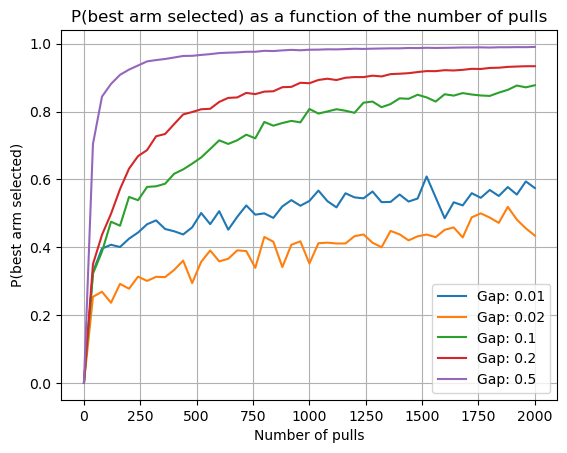

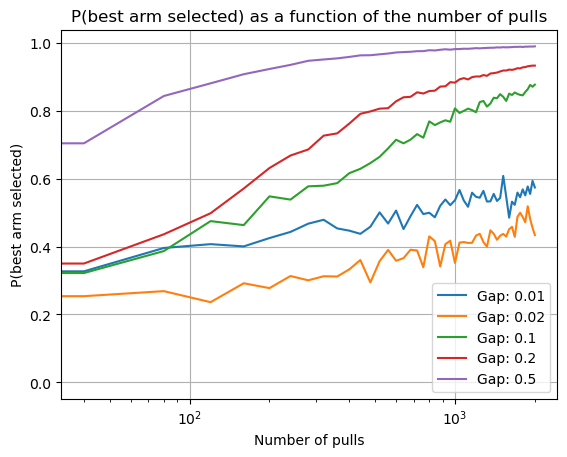

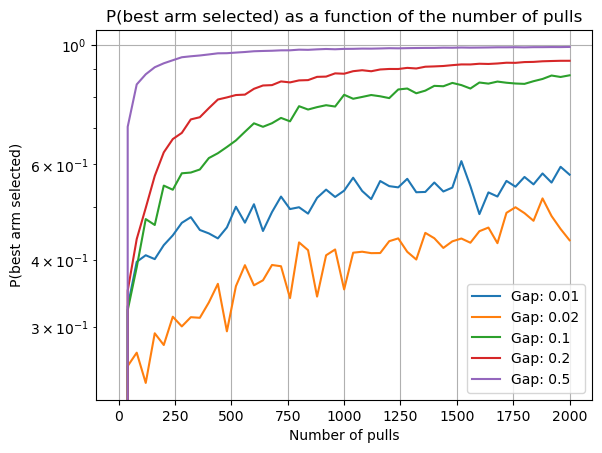

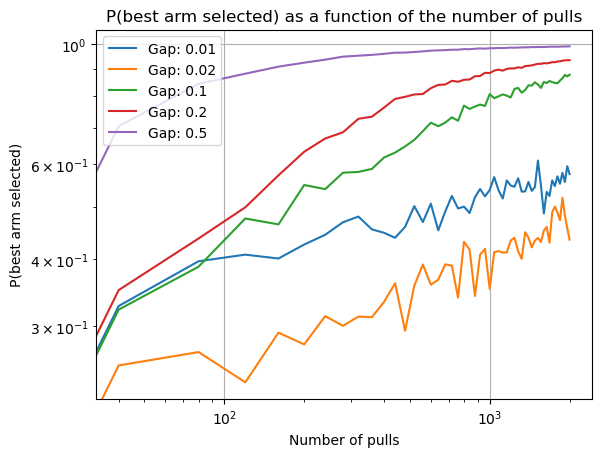

In [131]:
# Run the 'plot_explore_then_commit' function for 5 arms, 10000 throws, a reward of 1, and 100 runs

# simple T_EXPLORATION_ARRAY
TEST_ARRAY = [0, 1, 2, 3, 4, 5, 10, 100]

plot_thompson_sampling_beta(N_ARMS, THROW_ARRAY, array_probs, 100, GAPS)